## Installing libraries and loading the data.

This section imports necessary libraries and the custom TemperatureDataProcessor for our analysis. We then load the historical temperature data, previewing it to understand its structure. This step lays the groundwork for our project's main objectives: analyzing temperature trends and planning a temperature-based travel route.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import functions as fun
#Importing our customized class TemperatureDataProcessor
from TemperatureDataProcessor import TemperatureDataProcessor

# Create an instance of the class.
processor = TemperatureDataProcessor()

# Load the data file and display the first five rows
data_path = 'GLT_ByMajorCity.csv'
data = processor.load_data(data_path)
data.head()



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


## Data Cleaning and Transformation

In this step, we use the TemperatureDataProcessor to convert the 'dt' column to a datetime format, an essential part of data cleaning. This transformation facilitates time-based analysis. We also check the data types to ensure accuracy in our dataset, which is crucial for reliable temperature trend analysis.

In [16]:
# Convert the 'dt' column to the datetime type using the processor class
data = processor.clean_and_transform_data(data)
data.dtypes  # Check the data types


dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
Year                                      int32
dtype: object

## Transforming Coordinate Data
This cell focuses on transforming the 'Latitude' and 'Longitude' columns for geographical analysis. Our custom processor class adjusts these coordinates, preparing them for effective mapping and spatial analysis. The updated dataframe is displayed to verify the changes.

In [17]:
# Transform the 'Latitude' and 'Longitude' columns using the processor class
data = processor.transform_coordinates(data)

data.head()  # Display the results



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849


## Final Data Cleaning and Saving

This section completes the data cleaning process and saves the refined dataset. By using the clean_and_transform_data method, we ensure that our data is in the optimal format for analysis. The cleaned data is then saved as 'MajorCities.csv', ready for subsequent stages of our project.

In [18]:
# Clean and transform the data using the processor class
data = processor.clean_and_transform_data(data)

# Save the cleaned and processed data set as 'MajorCities.csv'
cleaned_data_path = 'MajorCities.csv'
data.to_csv(cleaned_data_path, index=False)

# Path to the saved file
cleaned_data_path


'MajorCities.csv'

## Loading and Inspecting Processed Data

This cell loads the previously cleaned and saved data from 'MajorCities.csv'. We display the first few rows to inspect the dataset and ensure it's ready for the next steps in our analysis.

In [19]:
# Load the processed data file and inspect its contents
cleaned_data = pd.read_csv('MajorCities.csv')

# Display the first five rows
cleaned_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849


## Analyzing Yearly Temperature Ranges and Identifying Top Cities

This cell calculates the yearly maximum and minimum temperatures for each city. Using these calculations, we identify the cities with the largest temperature ranges, focusing on the top 10. This analysis is key to understanding extreme temperature variations across cities.

In [20]:
# Calculate yearly maximum and minimum temperatures for each city using the processor class
city_yearly_temps = processor.calculate_city_yearly_temperature_ranges(cleaned_data)

# Find the largest temperature ranges for each city and select the top 10 cities using the processor class
top_cities_with_ranges = processor.find_top_cities_with_temp_ranges(city_yearly_temps)

top_cities_with_ranges


,City,Year,min,max,temp_range
34,Harbin,1922,-26.772,23.148,49.920
19,Changchun,1919,-20.179,26.572,46.751
64,Montreal,1761,-15.568,26.164,41.732
85,Shenyang,1922,-17.035,23.925,40.960
65,Moscow,2010,-15.846,24.580,40.426
48,Kiev,1929,-16.191,22.543,38.734
96,Toronto,1761,-11.312,25.649,36.961
92,Taiyuan,1930,-13.116,23.833,36.949
79,Saint Petersburg,1871,-18.644,17.592,36.236
71,New York,1761,-6.900,29.141,36.041


## Identifying Top Cities in a Specific Time Period

This section filters the data to focus on the years 1920 to 1970. After narrowing down the time range, we again determine the top cities with the largest temperature ranges during this period, providing insights into historical temperature variations.

In [21]:
# Filter data for the years between 1920 and 1970 and find the top cities using the processor class
city_yearly_temps_period = processor.filter_data_by_year_range(city_yearly_temps, 1920, 1970)
top_cities_with_ranges_period = processor.find_top_cities_with_temp_ranges(city_yearly_temps_period)

top_cities_with_ranges_period



,City,Year,min,max,temp_range
34,Harbin,1922,-26.772,23.148,49.920
19,Changchun,1922,-23.272,23.445,46.717
85,Shenyang,1922,-17.035,23.925,40.960
48,Kiev,1929,-16.191,22.543,38.734
65,Moscow,1956,-18.943,19.467,38.410
64,Montreal,1934,-17.961,20.073,38.034
92,Taiyuan,1930,-13.116,23.833,36.949
96,Toronto,1934,-15.502,20.057,35.559
94,Tianjin,1922,-7.931,27.222,35.153
73,Peking,1922,-7.931,27.222,35.153


## Filtering Data, Merging with Geographical Info, and Visualizing Temperature Ranges

This cell filters the temperature data from 1920 to 1970 and identifies the cities with the largest temperature ranges. We then merge this data with geographical information. The analysis is visualized through two plots: one showing temperature ranges over time and another in a bar graph format, highlighting the temperature variation for this period.



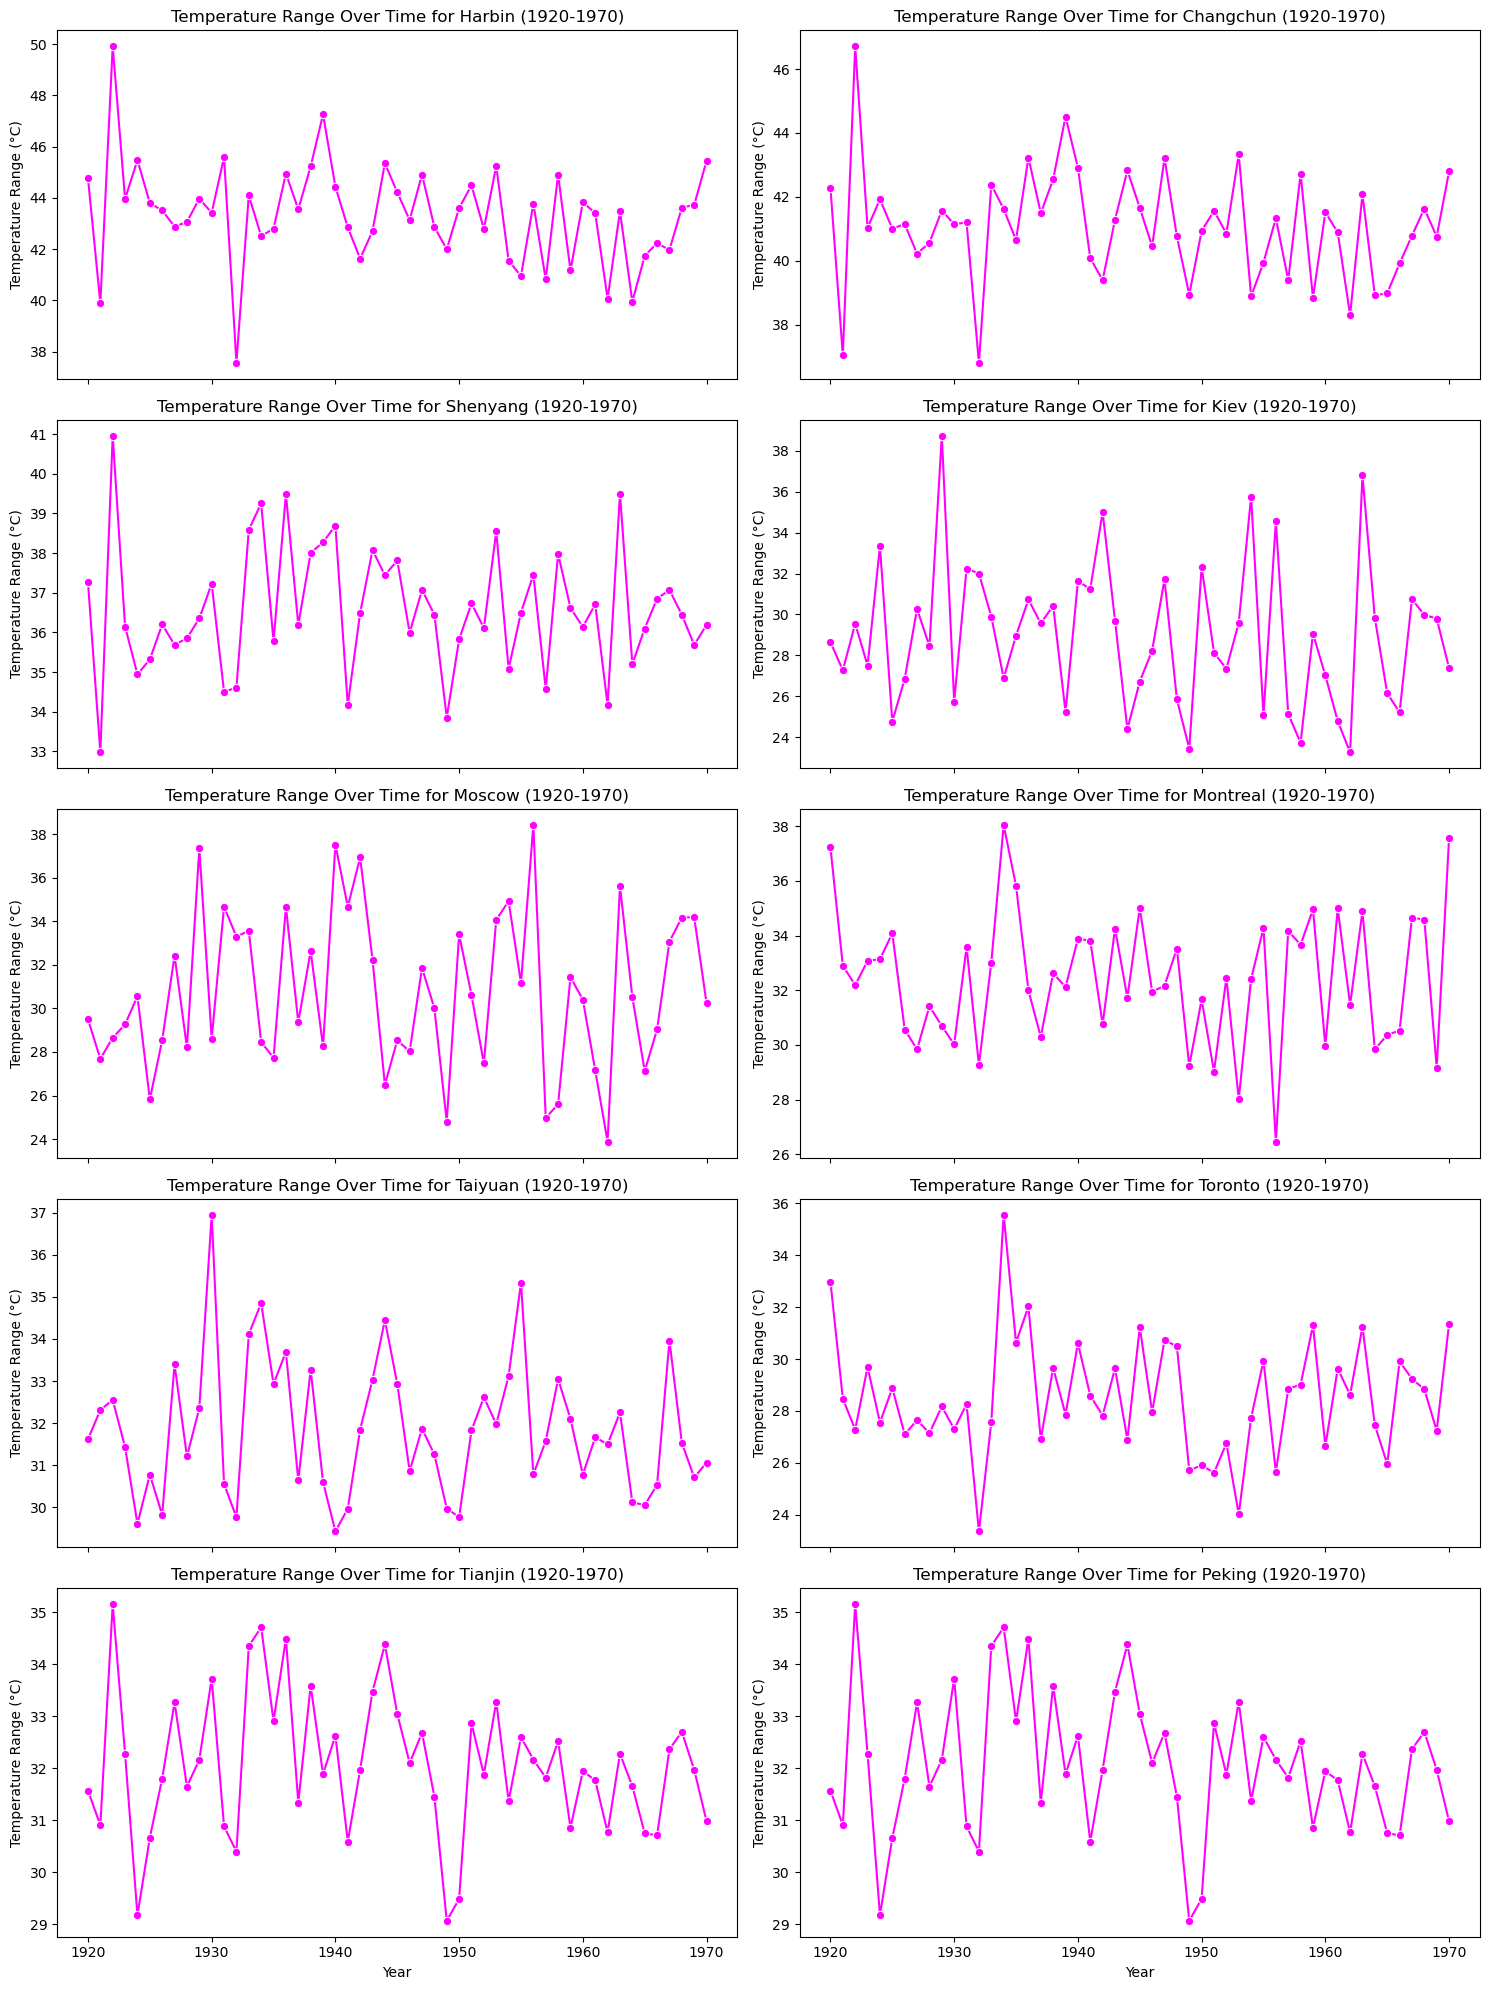

/Users/cihanelv/Desktop/xxx/functions.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


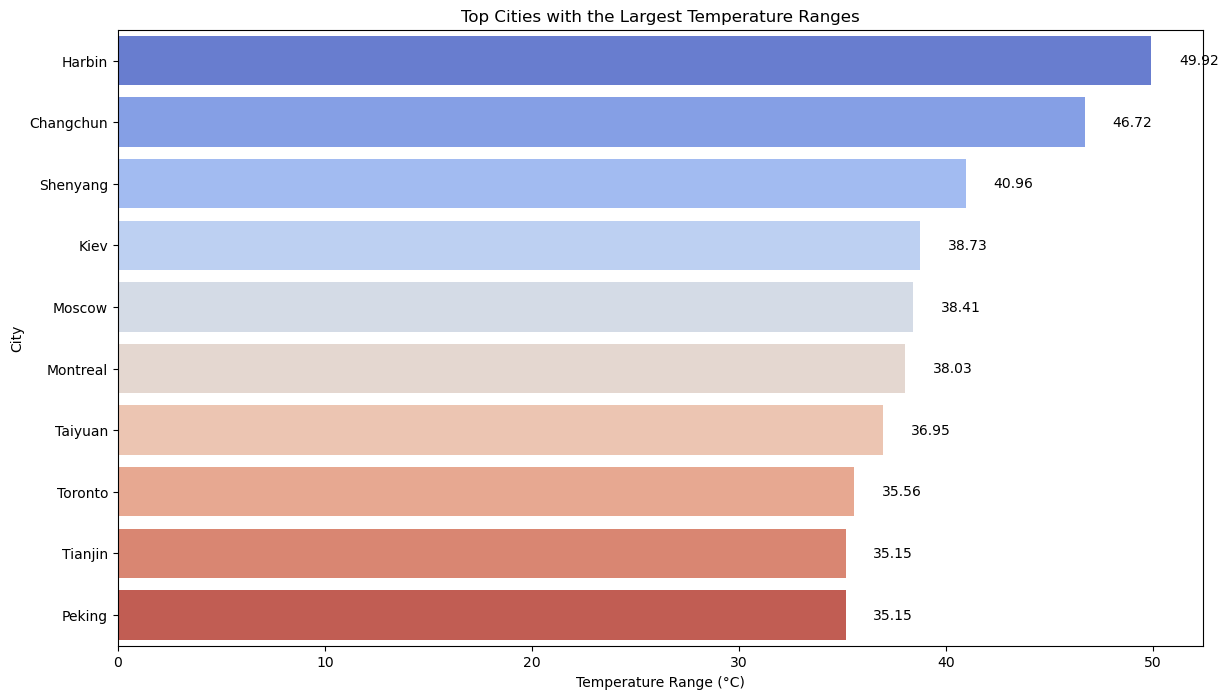

In [22]:
# Filter the data for the years between 1920 and 1970 and find the cities with the largest temperature ranges
city_yearly_temps_period = processor.filter_data_by_year_range(city_yearly_temps, 1920, 1970)
top_cities_with_ranges_period = processor.find_top_cities_with_temp_ranges(city_yearly_temps_period)

# Merge top cities with geographical data using the processor class
top_cities_geo = processor.merge_with_geographical_data(cleaned_data, top_cities_with_ranges_period)

# Plot the temperature range for 1920-1970 using functions from functions.py
fun.plot_temperature_range(city_data=city_yearly_temps_period, 
                           top_cities=top_cities_with_ranges_period['City'], 
                           start_year=1920, 
                           end_year=1970)

# Plot a bar graph for the temperature range based on data from 1920 to 1970
fun.plot_temperature_range_bar(city_data=top_cities_with_ranges_period, top_cities=top_cities_with_ranges_period['City'])


## Extracting Top Cities Based on Temperature Ranges (1920-1970)

This cell focuses on the period from 1920 to 1970, filtering the data to this timeframe. We calculate the yearly temperature ranges and then identify the top cities based on these ranges, offering insights into notable temperature variations during this historical period.

In [23]:
# Filter the data for the years between 1920 and 1970
filtered_data = processor.filter_data_by_year_range(cleaned_data, 1920, 1970)

# Calculate yearly temperature ranges using the processor class and find the top cities
city_yearly_temps = processor.calculate_city_yearly_temperature_ranges(filtered_data)
top_cities = processor.find_top_cities_with_temp_ranges(city_yearly_temps)

top_cities


,City,Year,min,max,temp_range
34,Harbin,1922,-26.772,23.148,49.920
19,Changchun,1922,-23.272,23.445,46.717
85,Shenyang,1922,-17.035,23.925,40.960
48,Kiev,1929,-16.191,22.543,38.734
65,Moscow,1956,-18.943,19.467,38.410
64,Montreal,1934,-17.961,20.073,38.034
92,Taiyuan,1930,-13.116,23.833,36.949
96,Toronto,1934,-15.502,20.057,35.559
94,Tianjin,1922,-7.931,27.222,35.153
73,Peking,1922,-7.931,27.222,35.153


## Merging Top Cities with Coordinates and Mapping Temperature Ranges

In this step, we reload the 'MajorCities.csv' data and extract the top cities with significant temperature ranges. We then merge this data with city coordinates to create a comprehensive dataset. Finally, using this merged data, we plot a map visualizing the temperature ranges of these top cities, enhancing our spatial understanding of the temperature trends.

/Users/cihanelv/Desktop/xxx/functions.py:141: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


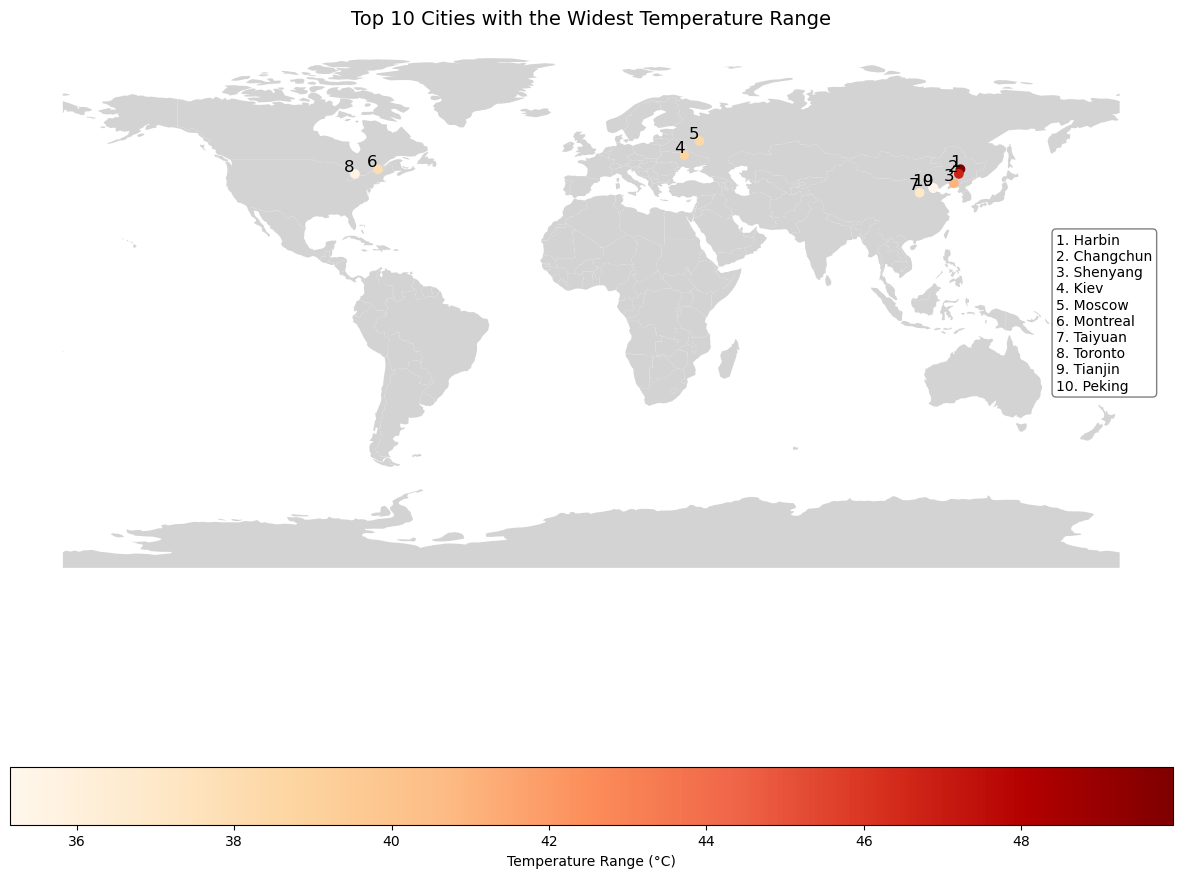

In [24]:
# Load the 'MajorCities.csv' file
major_cities_df = processor.load_data('MajorCities.csv')

# Create the 'top_cities' DataFrame
top_cities = processor.find_top_cities_with_temp_ranges(city_yearly_temps)

# Create a DataFrame containing coordinate information from 'MajorCities.csv'
city_coordinates = major_cities_df[['City', 'Latitude', 'Longitude']].drop_duplicates()

# Merge the 'top_cities' DataFrame with city coordinates
top_cities_with_coords = pd.merge(top_cities, city_coordinates, on='City')

# Call the updated function to draw the map
fun.plot_temperature_range_map(top_cities_with_coords, top_n=10)


## Calculating Yearly Average Temperatures (1920-1970)

In this cell, we start by loading the 'MajorCities.csv' file to obtain comprehensive city temperature data. We then extract the 'Year' from the 'dt' column for temporal analysis. Focusing on the years 1920 to 1970, we filter the data to this specific period using our processor class. The next step involves calculating the yearly average temperature for each city by grouping the data accordingly. This calculation provides us with an average temperature for each city per year, giving us a foundational dataset for analyzing historical temperature trends. The first five rows of this calculated data are displayed to ensure the accuracy and integrity of our processing.

In [25]:
# Load the CSV file using the processor class
cities_df = processor.load_data('MajorCities.csv')

# Extract the 'Year' from the 'dt' column
cities_df['Year'] = pd.to_datetime(cities_df['dt']).dt.year

# Filter the data for the years between 1920 and 1970 using the processor class
filtered_cities_df = processor.filter_data_by_year_range(cities_df, 1920, 1970)

# Calculate the yearly average temperature for each city
yearly_avg_temps = (
    filtered_cities_df.groupby(['City', 'Country', 'Latitude', 'Longitude', 'Year'])['AverageTemperature']
    .mean()
    .reset_index()
)

# Display the first five rows of the result
print(yearly_avg_temps.head())


      City        Country  Latitude  Longitude  Year  AverageTemperature
0  Abidjan  Côte D'Ivoire      5.63      -3.23  1920           26.324167
1  Abidjan  Côte D'Ivoire      5.63      -3.23  1921           26.420250
2  Abidjan  Côte D'Ivoire      5.63      -3.23  1922           26.229167
3  Abidjan  Côte D'Ivoire      5.63      -3.23  1923           25.962167
4  Abidjan  Côte D'Ivoire      5.63      -3.23  1924           26.092167


## Locating Coordinates for Beijing and Los Angeles

This section of the code is dedicated to extracting the geographical coordinates for the cities of Beijing (referred to as 'Peking' in the dataset) and Los Angeles from the cleaned data. We isolate the specific rows corresponding to each city and retrieve their latitude and longitude. These coordinates are crucial for later stages of the project where we plan the travel route based on temperature data.

In [26]:
# Find the coordinates of "Peking" and "Los Angeles" cities.
peking_coords = cleaned_data[cleaned_data['City'] == 'Peking'].iloc[0]
los_angeles_coords = cleaned_data[cleaned_data['City'] == 'Los Angeles'].iloc[0]


peking_coords, los_angeles_coords

(dt                               1820-08-01
 AverageTemperature                   22.822
 AverageTemperatureUncertainty         2.218
 City                                 Peking
 Country                               China
 Latitude                              39.38
 Longitude                            116.53
 Year                                   1820
 Name: 167116, dtype: object,
 dt                                  1849-01-01
 AverageTemperature                       8.819
 AverageTemperatureUncertainty            2.558
 City                               Los Angeles
 Country                          United States
 Latitude                                 34.56
 Longitude                               -118.7
 Year                                      1849
 Name: 124389, dtype: object)

## Calculating City Average Temperatures and Finding Cities Nearest to Beijing

In this cell, we calculate the overall average yearly temperature for each city by grouping our data accordingly. The resulting dataset provides a comprehensive view of the average temperatures across different cities. Then, utilizing a custom function, we identify the cities nearest to Beijing (Peking). This step is crucial for the travel route planning part of our project, where proximity and temperature data guide the journey from Beijing to Los Angeles.

In [27]:
# Calculate the overall average yearly temperatures for each city
city_avg_temps = yearly_avg_temps.groupby(['City', 'Country', 'Latitude', 'Longitude'])['AverageTemperature'].mean().reset_index()
# Use the dataset with only one record per city to find the cities nearest to Beijing
nearest_to_peking = fun.find_nearest_cities(peking_coords, city_avg_temps)
print(nearest_to_peking)


        City Country  Latitude  Longitude  AverageTemperature    Distance
94   Tianjin   China     39.38     116.53           11.915804    0.000000
93  Tangshan   China     37.78     113.90           11.728559  289.660775
24    Dalian   China     39.38     120.69           10.246918  357.514905


## Suggesting a Route from Beijing to Los Angeles

This cell utilizes a custom function to suggest a travel route from Beijing to Los Angeles. The function takes into account the coordinates of both cities and the average yearly temperatures of various cities. The resulting route is then printed, showcasing the recommended path which factors in temperature data, an innovative approach to travel planning in your project.

In [28]:
route = fun.suggest_route(peking_coords, los_angeles_coords, city_avg_temps)

# Print the route output.
print(route)


['Peking', 'Tianjin', 'Jinan', 'Tangshan', 'Xian', 'Chongqing', 'Guangzhou', 'Taipei', 'Wuhan', 'Shanghai', 'Nanjing', 'Seoul', 'Dalian', 'Taiyuan', 'Chengdu', 'Rangoon', 'Bangkok', 'Ho Chi Minh City', 'Singapore', 'Surabaya', 'Jakarta', 'Madras', 'Hyderabad', 'Nagpur', 'Surat', 'Bombay', 'Ahmadabad', 'Karachi', 'Jaipur', 'Delhi', 'New Delhi', 'Kanpur', 'Calcutta', 'Dhaka', 'Bangalore', 'Lakhnau', 'Pune', 'Lahore', 'Faisalabad', 'Baghdad', 'Riyadh', 'Jiddah', 'Umm Durman', 'Cairo', 'Gizeh', 'Alexandria', 'Aleppo', 'Izmir', 'Istanbul', 'Rome', 'Madrid', 'Casablanca', 'Dakar', 'Lagos', 'Ibadan', 'Abidjan', 'Kano', 'Kinshasa', 'Luanda', 'Harare', 'Dar Es Salaam', 'Mogadishu', 'Durban', 'Addis Abeba', 'Nairobi', 'Cape Town', 'Salvador', 'Fortaleza', 'Rio De Janeiro', 'Brasília', 'Belo Horizonte', 'São Paulo', 'Bogotá', 'Santo Domingo', 'Cali', 'Lima', 'Mexico', 'Los Angeles']
